In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [7]:
%matplotlib inline

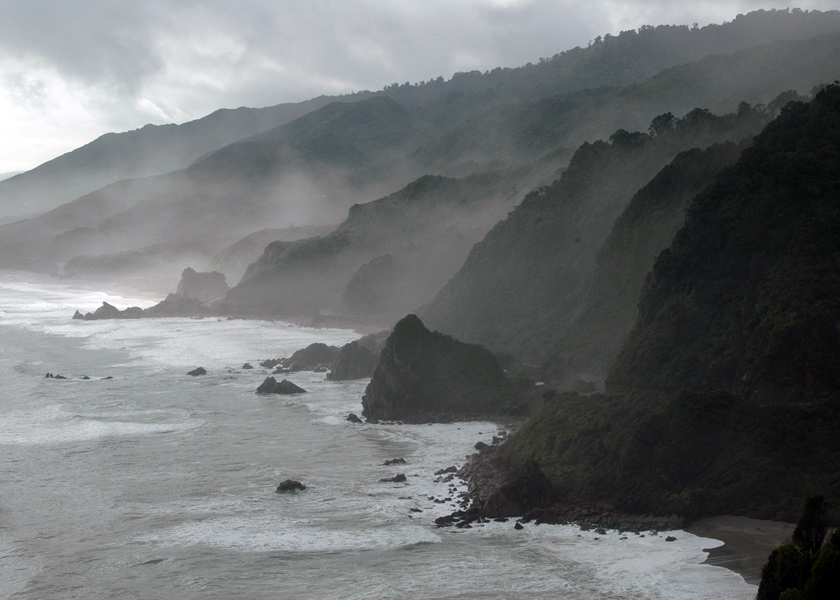

In [17]:
img_bgr = cv.imread("./img/New_Zealand_Coast.jpg", cv.IMREAD_COLOR)
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

Image(filename="./img/New_Zealand_Coast.jpg")

### Change image brightness

In [19]:
matrix = np.ones(img_rgb.shape, dtype = img_rgb.dtype) * 50

In [25]:
img_rgb_brighter = cv.add(img_rgb, matrix)
img_rgb_darker   = cv.subtract(img_rgb, matrix)

Text(0.5, 1.0, 'Brighter')

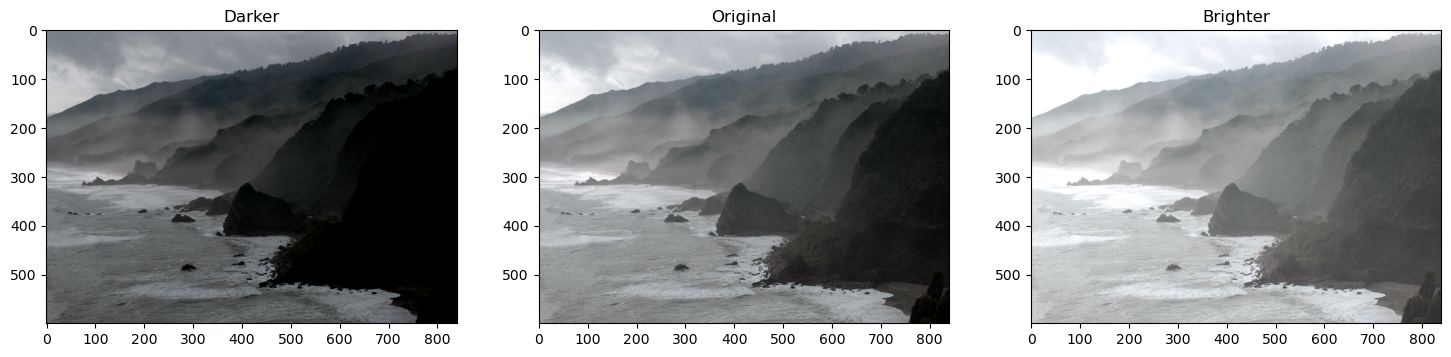

In [27]:
plt.figure(figsize=[18, 5])
plt.subplot(131); plt.imshow(img_rgb_darker); plt.title("Darker")
plt.subplot(132); plt.imshow(img_rgb); plt.title("Original")
plt.subplot(133); plt.imshow(img_rgb_brighter); plt.title("Brighter")

### Change image contrast

In [37]:
matrix1 = np.ones(img_rgb.shape) * .8
matrix2 = np.ones(img_rgb.shape) * 1.2

In [61]:
img_rgb_darker   = np.uint8(cv.multiply(np.float64(img_rgb), matrix1))
img_rgb_brighter = np.uint8(cv.multiply(np.float64(img_rgb), matrix2))

Text(0.5, 1.0, 'Higher Contrast')

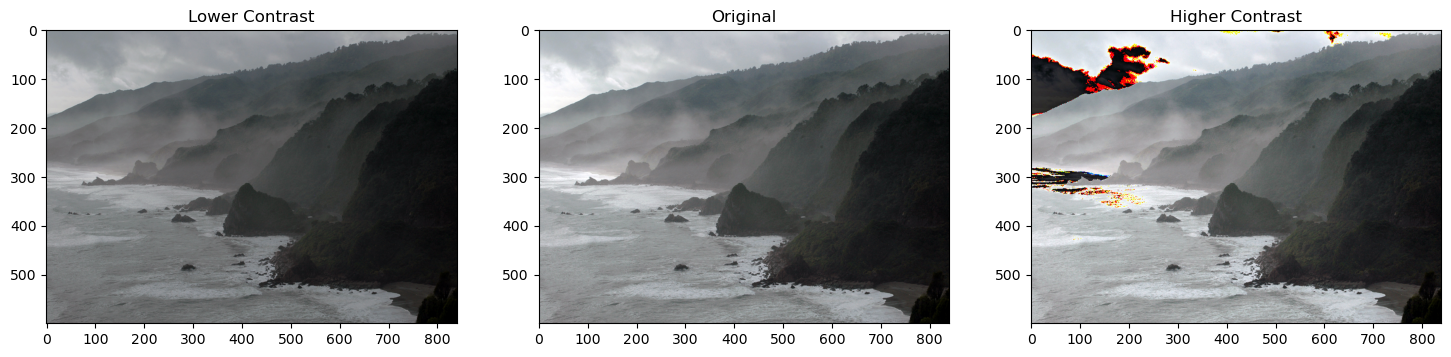

In [63]:
plt.figure(figsize=[18, 5])
plt.subplot(131); plt.imshow(img_rgb_darker); plt.title("Lower Contrast")
plt.subplot(132); plt.imshow(img_rgb); plt.title("Original")
plt.subplot(133); plt.imshow(img_rgb_brighter); plt.title("Higher Contrast")

### Handling overflow in contrast using np.clip

In [66]:
img_rgb_darker   = np.uint8(cv.multiply(np.float64(img_rgb), matrix1))
img_rgb_brighter = np.uint8(np.clip(cv.multiply(np.float64(img_rgb), matrix2), 0, 255))

Text(0.5, 1.0, 'Higher Contrast')

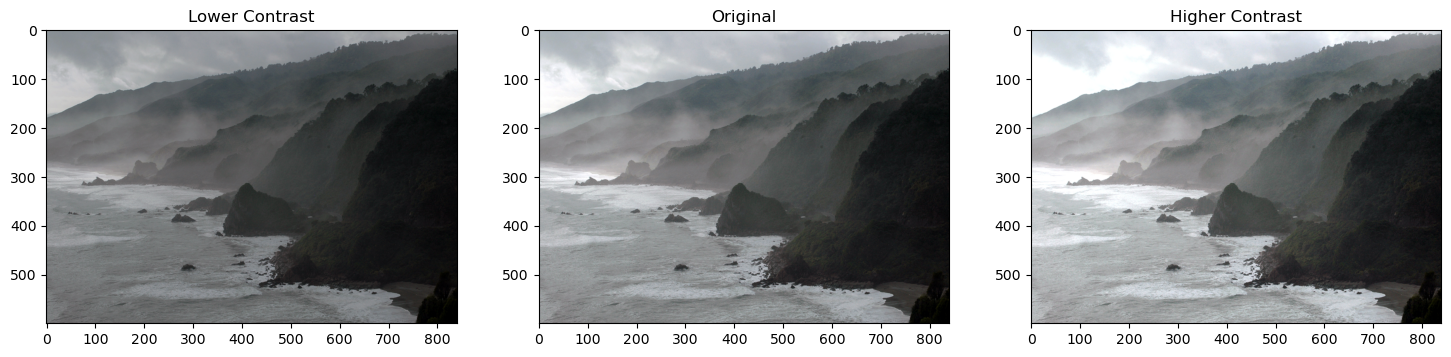

In [68]:
plt.figure(figsize=[18, 5])
plt.subplot(131); plt.imshow(img_rgb_darker); plt.title("Lower Contrast")
plt.subplot(132); plt.imshow(img_rgb); plt.title("Original")
plt.subplot(133); plt.imshow(img_rgb_brighter); plt.title("Higher Contrast")

### Image Thresholding

In [71]:
img_read = cv.imread("./img/building-windows.jpg", cv.IMREAD_GRAYSCALE)

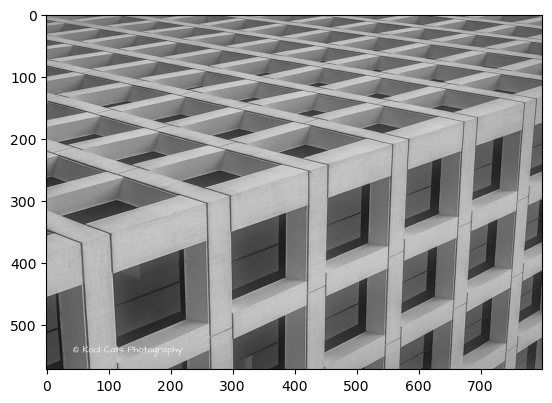

In [77]:
img_read_rgb = cv.cvtColor(img_read, cv.COLOR_BGR2RGB)
plt.imshow(img_read_rgb)

In [81]:
retval, img_thresh = cv.threshold(img_read, 100, 255, cv.THRESH_BINARY)

(572, 800)


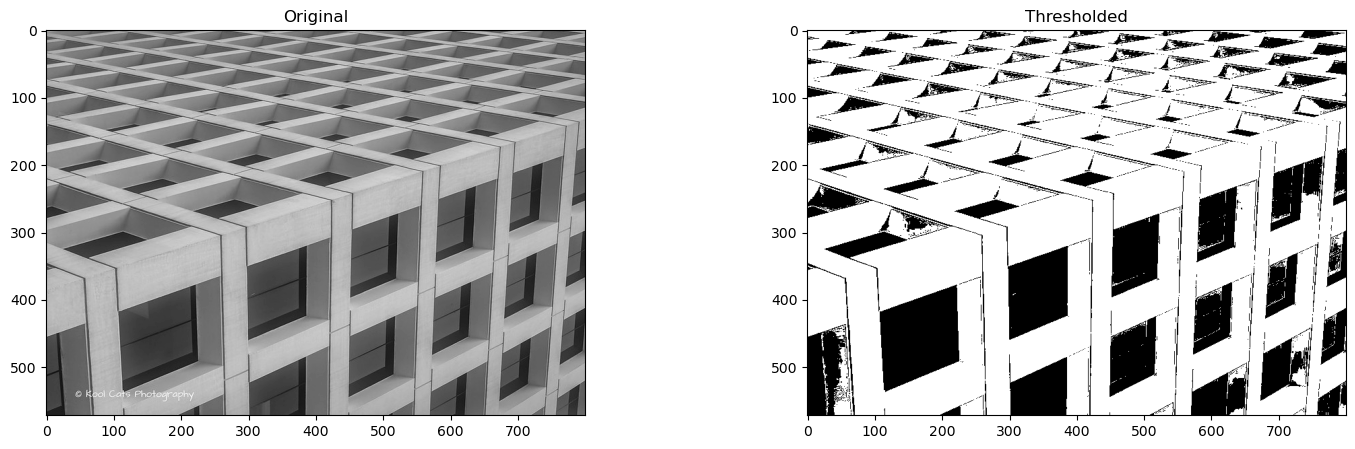

In [85]:
plt.figure(figsize=[18, 5])
plt.subplot(121); plt.imshow(img_read, cmap="gray"); plt.title("Original")
plt.subplot(122); plt.imshow(img_thresh, cmap="gray"); plt.title("Thresholded")

print(img_thresh.shape)

In [87]:
img_read = cv.imread("./img/Piano_Sheet_Music.png", cv.IMREAD_GRAYSCALE)

In [89]:
retval, img_thresh_gbl_1 = cv.threshold(img_read, 50, 255, cv.THRESH_BINARY)
retval, img_thresh_gbl_2 = cv.threshold(img_read, 120, 255, cv.THRESH_BINARY)

In [91]:
img_thresh_adp = cv.adaptiveThreshold(img_read, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 7)

Text(0.5, 1.0, 'Threshholded (adaptive)')

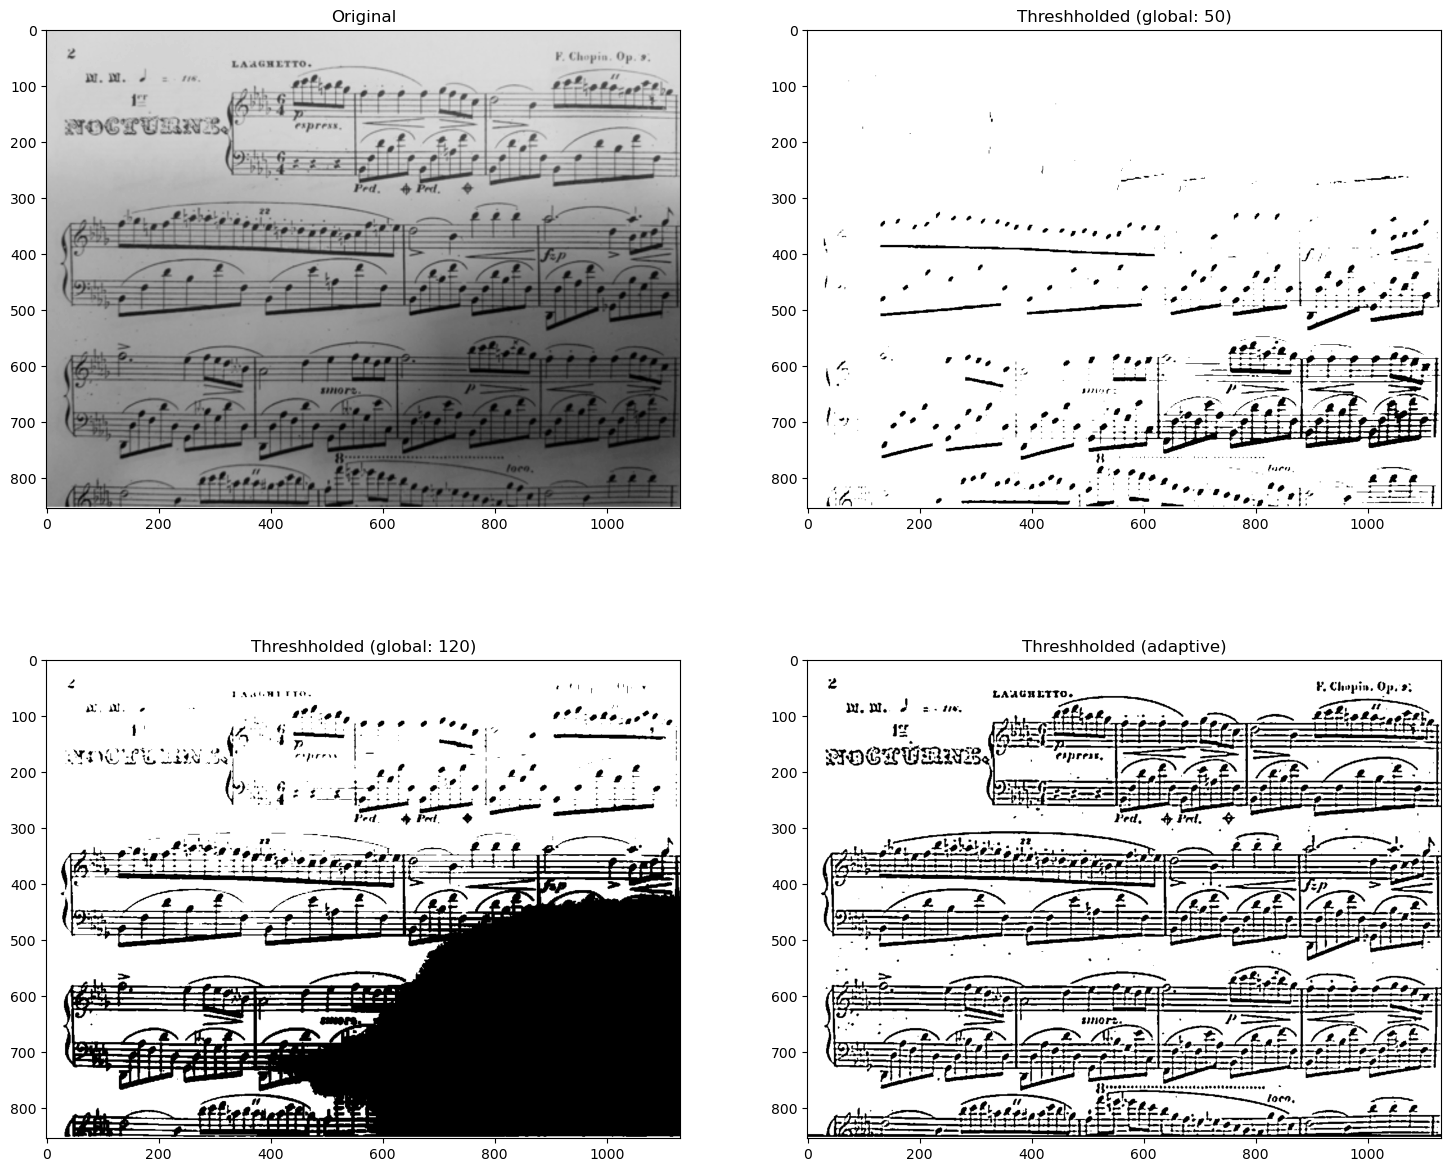

In [95]:
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img_read, cmap="gray");          plt.title("Original")
plt.subplot(222); plt.imshow(img_thresh_gbl_1, cmap="gray");  plt.title("Threshholded (global: 50)")
plt.subplot(223); plt.imshow(img_thresh_gbl_2, cmap="gray");  plt.title("Threshholded (global: 120)")
plt.subplot(224); plt.imshow(img_thresh_adp, cmap="gray");    plt.title("Threshholded (adaptive)")

### Bitwise operations

In [102]:
img_rec = cv.imread("./img/rectangle.jpg", cv.IMREAD_GRAYSCALE)
img_cir = cv.imread("./img/circle.jpg", cv.IMREAD_GRAYSCALE)

(200, 499)
(200, 499)


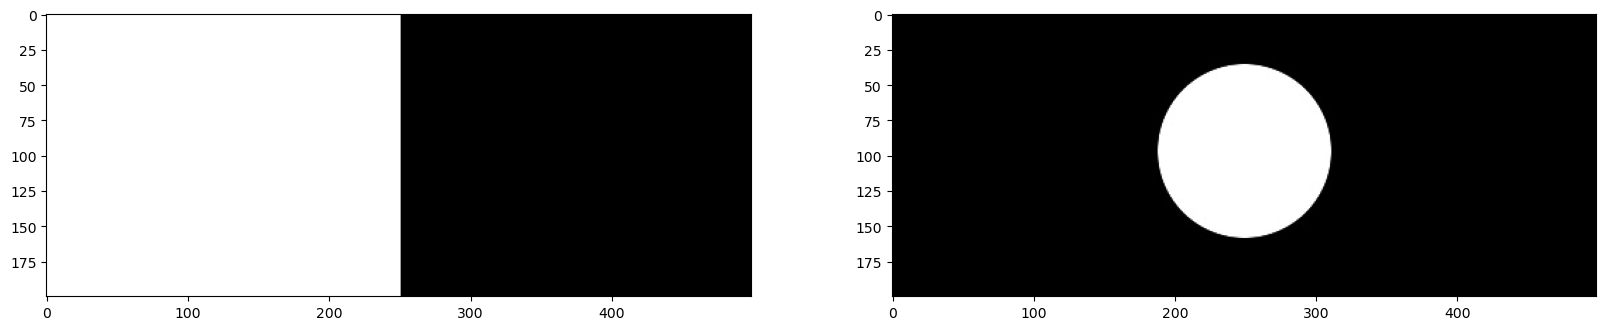

In [110]:
plt.figure(figsize=[20, 5])
plt.subplot(121); plt.imshow(img_rec, cmap="gray")
plt.subplot(122); plt.imshow(img_cir, cmap="gray")

print(img_rec.shape)
print(img_cir.shape)

#### Bitwise AND Operator

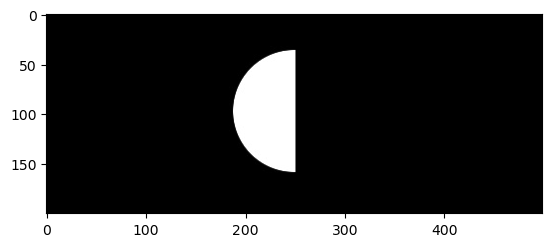

In [113]:
result = cv.bitwise_and(img_rec, img_cir, mask = None)
plt.imshow(result, cmap="gray")

#### Bitwise OR Operator

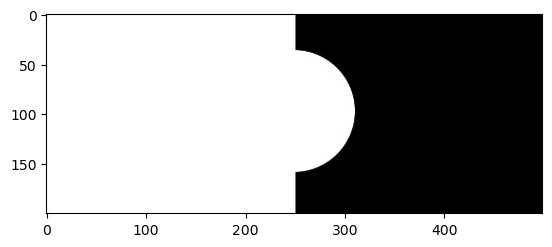

In [118]:
result = cv.bitwise_or(img_rec, img_cir, mask = None)
plt.imshow(result, cmap="gray")

#### Bitwise XOR Operator

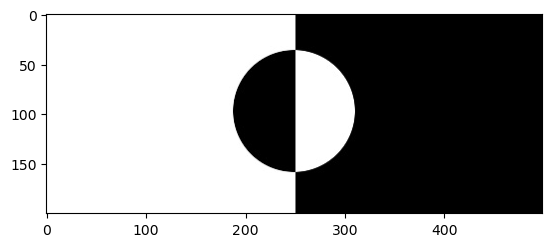

In [125]:
result = cv.bitwise_xor(img_rec, img_cir, mask = None)
plt.imshow(result, cmap="gray")

---

# Application: Logo Manipulation

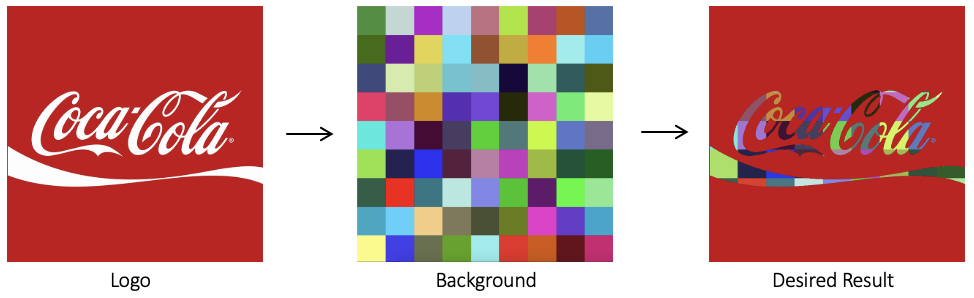

In [129]:
Image("./img/Logo_Manipulation.png")

#### Read foreground image

(700, 700, 3)


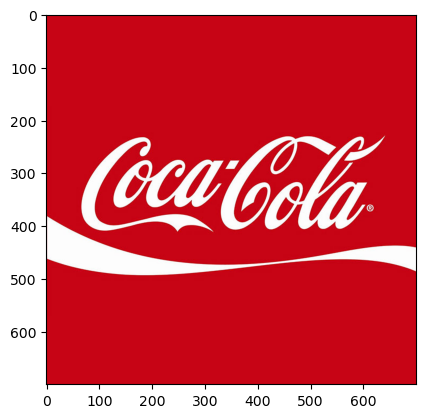

In [141]:
img_bgr = cv.imread("./img/coca-cola-logo.png", cv.IMREAD_COLOR)
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

plt.imshow(img_rgb)

print(img_rgb.shape)

In [143]:
logo_w = img_rgb.shape[0]
logo_h = img_rgb.shape[1]

In [145]:
img_background_bgr = cv.imread("./img/checkerboard_color.png", cv.IMREAD_COLOR)
img_background_rgb = cv.cvtColor(img_background_bgr, cv.COLOR_BGR2RGB)

In [149]:
aspect_ratio = logo_w / img_background_rgb.shape[1]
dim = (logo_w, int(img_background_rgb.shape[0] * aspect_ratio))

In [151]:
img_background_rgb = cv.resize(img_background_rgb, dim, interpolation = cv.INTER_AREA)

(700, 700, 3)


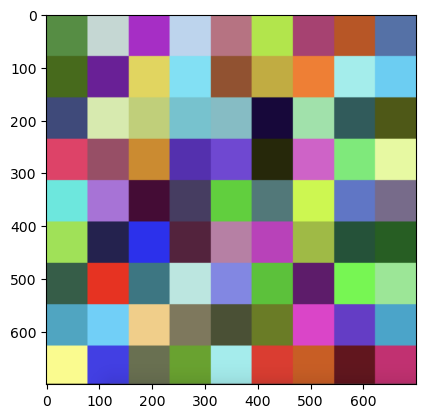

In [153]:
plt.imshow(img_background_rgb)
print(img_background_rgb.shape)

### Create mask for original image

In [156]:
img_gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)

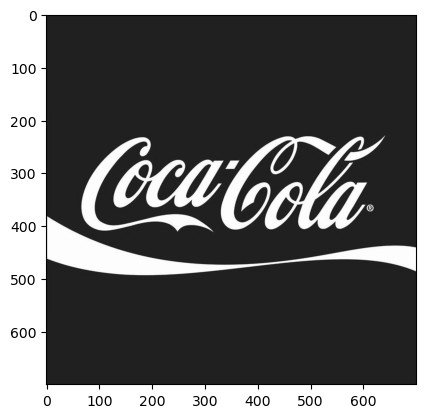

In [190]:
plt.imshow(img_gray, cmap="gray")

In [192]:
retval, img_mask = cv.threshold(img_gray, 127, 255, cv.THRESH_BINARY)

(700, 700)


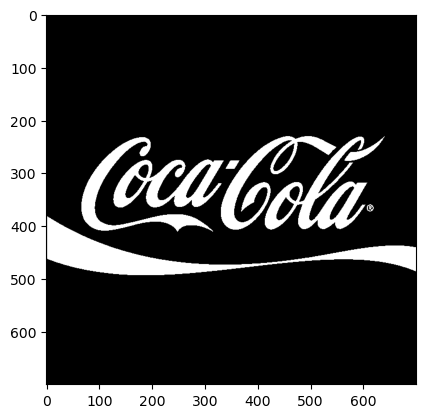

In [194]:
plt.imshow(img_mask, cmap="gray")
print(img_mask.shape)

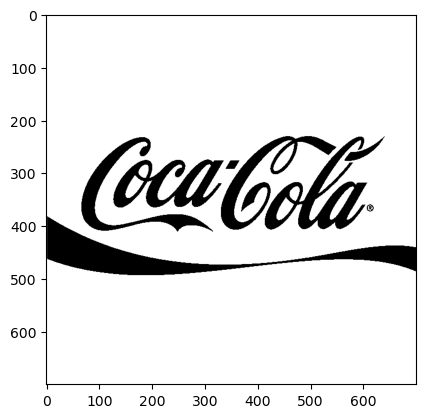

In [196]:
# Invert the mask

img_mask_inv = cv.bitwise_not(img_mask)
plt.imshow(img_mask_inv, cmap="gray")

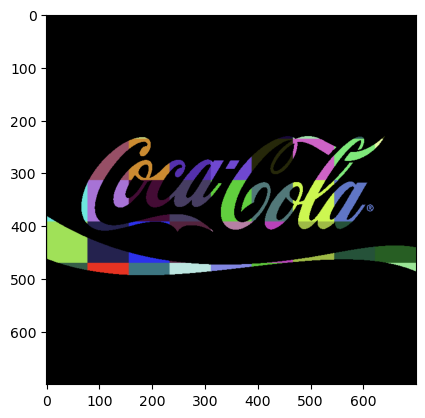

In [188]:
img_background = cv.bitwise_and(img_background_rgb, img_background_rgb, mask = img_mask)
plt.imshow(img_background)

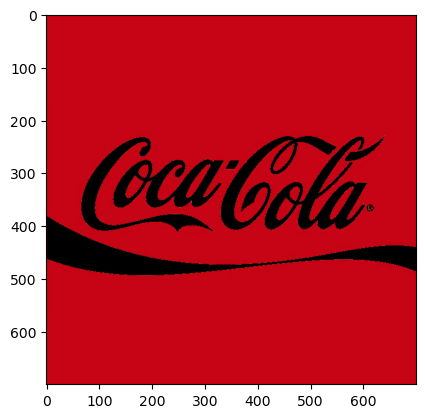

In [198]:
# Isolate foreground from image

img_foreground = cv.bitwise_and(img_rgb, img_rgb, mask = img_mask_inv)
plt.imshow(img_foreground)

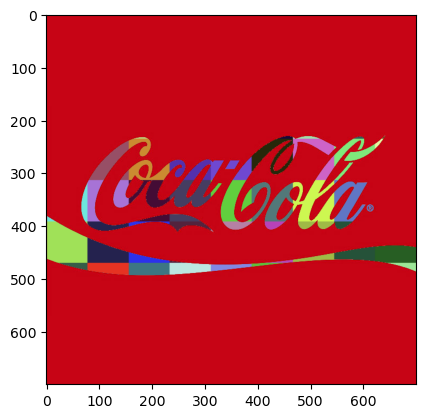

In [200]:
# Results: merge foreground and background

result = cv.add(img_background, img_foreground)
plt.imshow(result)

In [202]:
cv.imwrite("./img/logo_final.png", result[:,:,::-1])

True

In [242]:
arr1 = np.array([200, 250], dtype=np.uint8).reshape(-1, 1)
print(arr1)
print(arr1.shape)

[[200]
 [250]]
(2, 1)


In [244]:
arr2 = np.array([40, 40], dtype=np.uint8).reshape(-1, 1)
print(arr2)
print(arr2.shape)

[[40]
 [40]]
(2, 1)


In [236]:
add_numpy = arr1 + arr2
print(add_numpy)

[[240]
 [ 34]]


In [240]:
add_cv2 = cv.add(arr1, arr2)
print(add_cv2)

[[240]
 [255]]
